In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('movies.dat', delimiter = '::', names = ['movieid','title','genres'],encoding = 'latin-1')
ratings = pd.read_csv('ratings.dat', delimiter = '::', names = ['userid','movieid','rating','timestamp'])
users = pd.read_csv('users.dat', delimiter = '::', names = ['userid','gender','age','occupation','zip_code'])

In [5]:
movies.head(1)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [6]:
ratings.head(1)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760


In [7]:
users.head(1)

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067


In [9]:
df1 = pd.merge(users.drop('zip_code',axis =1),ratings.drop('timestamp',axis = 1), on = 'userid')
master_data = pd.merge(df1, movies, on = 'movieid')

In [11]:
master_data.head()

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [12]:
master_data.shape

(1000209, 8)

In [14]:
#User Age Distribution
master_data.age.value_counts(normalize = True).to_frame()

,age
25,0.395473
35,0.198961
18,0.183498
45,0.083616
50,0.072475
56,0.038772
1,0.027205


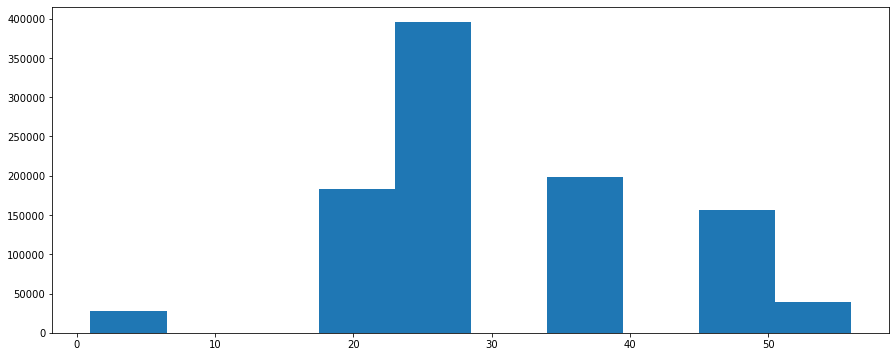

In [15]:
fig = plt.figure(figsize = (15 ,6))
plt.hist(master_data['age']);

In [17]:
#Top 25 movies by viewership rating
movie_rating = master_data[['title','rating']].groupby('title').mean().sort_values('rating',ascending = False)
movie_rating.head(25)

,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [19]:
#User rating of the movie “Toy Story”
movie_rating.loc[['Toy Story (1995)']]

,rating
title,
Toy Story (1995),4.146846


In [20]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
master_data[master_data['userid']== 2696]

,userid,gender,age,occupation,movieid,rating,title,genres
24345,2696,M,25,7,1270,2,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,M,25,7,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,800,5,Lone Star (1996),Drama|Mystery
273633,2696,M,25,7,3386,1,JFK (1991),Drama|Mystery
277808,2696,M,25,7,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,M,25,7,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,1589,3,Cop Land (1997),Crime|Drama|Mystery
598042,2696,M,25,7,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,M,25,7,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller


In [21]:
movies['col_genres']=movies['genres'].apply(lambda x : str(x).split('|'))
movies.head()

,movieid,title,genres,col_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [22]:
#all the unique genres
genres = []
for i in movies['col_genres']:
    genres.extend(i)
genres = set(genres)
print(genres)

{'Drama', 'Crime', 'Horror', 'Animation', 'Thriller', 'Documentary', 'War', 'Comedy', 'Romance', 'Action', 'Sci-Fi', 'Musical', 'Mystery', 'Western', 'Fantasy', 'Film-Noir', 'Adventure', "Children's"}


In [23]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
for i in genres:
    print(i)
    master_data[i] = master_data['genres'].apply(lambda x : 1 if i in x else 0)
master_data.head(1)    

Drama
Crime
Horror
Animation
Thriller
Documentary
War
Comedy
Romance
Action
Sci-Fi
Musical
Mystery
Western
Fantasy
Film-Noir
Adventure
Children's


,userid,gender,age,occupation,movieid,rating,title,genres,Drama,Crime,...,Romance,Action,Sci-Fi,Musical,Mystery,Western,Fantasy,Film-Noir,Adventure,Children's
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Determine the features affecting the ratings of any particular movie.
master_data.corr()

,userid,age,occupation,movieid,rating,Drama,Crime,Horror,Animation,Thriller,...,Romance,Action,Sci-Fi,Musical,Mystery,Western,Fantasy,Film-Noir,Adventure,Children's
userid,1.000000,0.034688,-0.026698,-0.017739,0.012303,0.006572,0.003469,-0.001392,-0.007665,-0.001107,...,0.006834,-0.002023,-0.003283,-0.000222,0.004334,0.004114,0.002212,0.004701,-0.000683,-0.004862
age,0.034688,1.000000,0.078371,0.027575,0.056869,0.063856,-0.007931,-0.023901,-0.047020,-0.014100,...,0.017503,-0.030975,-0.010879,0.005158,0.024308,0.038177,-0.024222,0.033495,-0.016730,-0.052858
occupation,-0.026698,0.078371,1.000000,0.008585,0.006753,-0.012326,0.002821,0.001439,-0.003834,0.008981,...,-0.014018,0.018347,0.026250,-0.007312,0.002421,0.005924,0.001299,0.005246,0.014309,-0.006906
movieid,-0.017739,0.027575,0.008585,1.000000,-0.064042,-0.030856,-0.061896,0.057613,-0.014177,-0.058418,...,-0.118375,-0.042046,-0.011747,-0.059381,-0.028561,0.003940,-0.018792,-0.019655,-0.082413,-0.071589
rating,0.012303,0.056869,0.006753,-0.064042,1.000000,0.122561,0.033446,-0.094353,0.019670,-0.004806,...,0.009644,-0.047633,-0.044487,0.015643,0.015848,0.007311,-0.023312,0.060259,-0.036718,-0.039829
Drama,0.006572,0.063856,-0.012326,-0.030856,0.122561,1.000000,0.070479,-0.189551,-0.154479,-0.153717,...,0.023552,-0.202415,-0.212747,-0.094778,-0.027689,-0.045945,-0.096929,-0.067297,-0.194570,-0.135707
Crime,0.003469,-0.007931,0.002821,-0.061896,0.033446,0.070479,1.000000,-0.047899,-0.062520,0.115095,...,-0.073320,0.088519,-0.083730,-0.061179,0.080093,-0.042711,-0.033745,0.136237,-0.045924,-0.081977
Horror,-0.001392,-0.023901,0.001439,0.057613,-0.094353,-0.189551,-0.047899,1.000000,-0.049730,0.056629,...,-0.099434,-0.042733,0.056505,-0.018924,-0.002423,-0.041784,-0.055803,-0.039157,-0.057256,-0.077099
Animation,-0.007665,-0.047020,-0.003834,-0.014177,0.019670,-0.154479,-0.062520,-0.049730,1.000000,-0.085713,...,-0.054540,-0.110294,-0.055526,0.335231,-0.042488,-0.030908,0.012025,0.037013,0.004732,0.576204
Thriller,-0.001107,-0.014100,0.008981,-0.058418,-0.004806,-0.153717,0.115095,0.056629,-0.085713,1.000000,...,-0.081384,0.202756,0.102546,-0.100690,0.225281,-0.058897,-0.087374,0.115231,-0.038423,-0.132642


In [25]:
master_data.corr()[['rating']]

,rating
userid,0.012303
age,0.056869
occupation,0.006753
movieid,-0.064042
rating,1.000000
Drama,0.122561
Crime,0.033446
Horror,-0.094353
Animation,0.019670
Thriller,-0.004806


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x=master_data[['age','Drama', 'Crime', 'Horror', 'Animation', 'Thriller', 'Documentary', 'War', 'Comedy', 'Romance', 'Action', 'Sci-Fi', 'Musical', 'Mystery', 'Western', 'Fantasy', 'Film-Noir', 'Adventure', "Children's"]]
y=master_data['rating']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [29]:
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
#Develop an appropriate model to predict the movie ratings
model.predict(x_test)

array([3.10466514, 3.54741738, 3.43850878, ..., 3.56873506, 3.44691162,
       3.43945142])